# **Biodiversity and Resilience in Smart Cities** 🐳🌆🌳


---


---





##Drive-Colab

In [1]:
# para que colab saque info de mis carpetas de drive y también las guarde
#from google.colab import drive
#drive.mount('/content/gdrive')

#from pydrive.drive import GoogleDrive

In [2]:
#colab
#path_base = 'gdrive/MyDrive/Doctorado_UACH/BD_resili'

##Pandas y GeoPandas

In [3]:
# para instalar (! para que sea en la terminal, no solo en notebook y pip es gestor de paquetes de python)
#!pip install pygeos
import matplotlib.pyplot as plt
from tqdm import tqdm
import geopandas as gpd
import pandas as pd
import glob
import os

##Paquetes Gráficos y Otros

In [4]:
!pip install ipyplot 
from shapely.geometry.polygon import LinearRing, Polygon

import zipfile 
import numpy as np



---

#Shapes y polígonos

---



**Datos Iniciales**
---



Capa regiones Chile descargado de [BCN](https://www.bcn.cl/siit/mapas_vectoriales/index_html)

In [5]:
#cd Datos
#ls
#cd DatShape
#ls
#Regiones
#cd .. #para volver a carpeta DatShape
#C:\Users\Mariana\Google Drive\Doctorado\BD_resili\Datos

In [6]:
ls

 El volumen de la unidad C es OS
 El n£mero de serie del volumen es: 9E3A-F665

 Directorio de C:\Users\Mariana\Google Drive\Doctorado\BD_resili

20-09-2022  20:11    <DIR>          .
20-09-2022  20:08    <DIR>          ..
20-09-2022  10:35    <DIR>          .ipynb_checkpoints
05-01-2022  16:00               273 Abstract Biodiversity, Resilience and Smart Cities.gdoc
20-09-2022  20:10               273 BD Resilience Smart Cities.gdoc
20-09-2022  20:08           496.698 BD_GBIF_completo.ipynb
08-09-2022  13:03               582 BD_resili
17-06-2022  11:12               273 BD_Resilience_Smartcities.gslides
20-09-2022  16:00               273 Cuestionario sobre Contribuciones de la Naturaleza a las Personas y Resiliencia (respuestas).gsheet
01-09-2022  19:27               273 Cuestionario sobre Contribuciones de la Naturaleza a las Personas y Resiliencia.gform
20-09-2022  15:55    <DIR>          Datos
08-09-2022  13:13           122.027 High resoltion.png
11-08-2022  13:35               

In [7]:
#path_base_shape = 'gdrive/MyDrive/Doctorado_UACH/BD_resili/Datos/DatShape/' #para no tener que escribir todas las carpetas
ch = gpd.read_file('Datos/DatShape/Regiones/Regional.shp') #regiones de Chile en tal long, pero EPSG diferente a ch_wgs
ch = ch.to_crs("EPSG:32719") #regiones de Chile en UTM
ch_wgs = ch.to_crs("EPSG:4326") #regiones de Chile en lat long

Capa entidades urbanas a analizar

In [8]:
#Leer la capa y guardarla como GeoDataFrame
df = gpd.read_file('Datos/DatShape/Entidades_urb_UTM19S.shp')

#Limpieza información del GeoDataFrame df
#se eliminaron: 'timestamp','begin', 'end','altitudeMo','tessellate','extrude','visibility','drawOrder','icon','snippet' porque todas tenían la misma info: None	None	None	clampToGround	-1	0	-1	None	None	None
df.drop(columns=['timestamp','begin', 'end','altitudeMo','tessellate','extrude','visibility','drawOrder','icon','snippet'], inplace=True) 

#Capa de entidades urbanas en lat long
df_wgs = df.to_crs("EPSG:4326") #GeodataFrame en lat long (EPSG 4326 WGS 84)

In [9]:
cities = df.Name        #serie de las ciudades
n_cities = df.shape[0]  #53 ciudades, desde 0 a 52 
                        #se usa 0 porque o si no, entrega #filas,#columnas y yo necesito #filas

In [11]:
#Guardar nombres de las ciudades

#para guardar el drive uchile
#cities.to_csv('gdrive/MyDrive/Doctorado_UACH/BD_resili/Datos/cities.csv',index=False) 

#cities.to_csv('BD_resili',index=False) #por alguna razón esto no funcionó Permision denied

**Buffer/hull de las ciudades (polígonos)**
---

---
#Descarga de datos de BD

---

**Datos de Chile**
---



In [13]:
years = [ 2017 , 2018 , 2019 , 2020 , 2021 , 2022 ]
occ_chile = [ 362765 , 470729 , 652033 , 614853 , 702368 , 19103] # datos de ocurrencias en Chile 
                                                                  # los saqué a mano de: https://www.gbif.org/occurrence/charts?q=chile&year=2017,2022 
                                                                  # para no tener que descargar todo

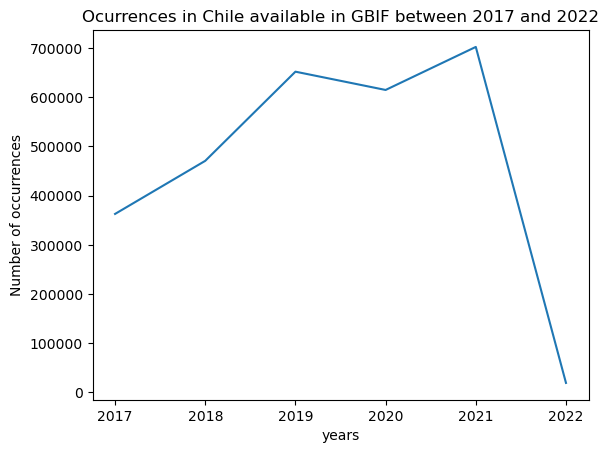

In [14]:
plt.plot(years,occ_chile)
plt.xlabel('years')
plt.ylabel('Number of occurrences')
plt.title('Ocurrences in Chile available in GBIF between 2017 and 2022')
plt.savefig("High resoltion.png",dpi=300)

---

#Análisis de datos de BD

---


In [15]:
ls

 El volumen de la unidad C es OS
 El n£mero de serie del volumen es: 9E3A-F665

 Directorio de C:\Users\Mariana\Google Drive\Doctorado\BD_resili

20-09-2022  21:36    <DIR>          .
20-09-2022  20:08    <DIR>          ..
20-09-2022  10:35    <DIR>          .ipynb_checkpoints
05-01-2022  16:00               273 Abstract Biodiversity, Resilience and Smart Cities.gdoc
20-09-2022  20:10               273 BD Resilience Smart Cities.gdoc
20-09-2022  21:36            37.003 BD_GBIF_completo.ipynb
08-09-2022  13:03               582 BD_resili
17-06-2022  11:12               273 BD_Resilience_Smartcities.gslides
20-09-2022  16:00               273 Cuestionario sobre Contribuciones de la Naturaleza a las Personas y Resiliencia (respuestas).gsheet
01-09-2022  19:27               273 Cuestionario sobre Contribuciones de la Naturaleza a las Personas y Resiliencia.gform
20-09-2022  15:55    <DIR>          Datos
20-09-2022  21:38           122.027 High resoltion.png
11-08-2022  13:35               

In [16]:
#datos para análisis
#path__base_bd = 'gdrive/MyDrive/Doctorado_UACH/BD_resili/GBIF_BDdata/'
col_used = [0,26,59,63,67,72,106,107,108,137,138,180,181,182,187,188,196,197,198,199,200,201,202,203,204,206,207,209,227,229,230,231,232,233,234,235,236,237,238,239,240,241,256]
citi_names = pd.read_csv(r'C:\Users\Mariana\Google Drive\Doctorado\BD_resili\Datos\cities.csv',sep='\t') 

In [17]:
#Extraer occurrence.txt 
#esto no me funcionó, solo tengo una prueba con Niebla, que descomprimí en la carpeta de todas

#path_bd_zip = 'gdrive/MyDrive/Doctorado_UACH/BD_resili/GBIF_BDdata/GBIF_Niebla_2021.zip'

#niebla_zip = zipfile.ZipFile(path_bd_zip, "r")
#occ_niebla = niebla_zip.extract('occurrence.txt','path_bd_zip')
#occ_niebla_csm = pd.read_csv('./occurrence.txt', sep='\t')
#archivo_zip = zipfile.ZipFile(path_bd_zip, "r")
#archivo_zip = archivo_zip.extractall(path=path_bd)
#gbif_niebla = pd.read_csv('.', sep='\t')

#bounds_niebla.to_csv('gdrive/MyDrive/Doctorado/BD_resili/Datos/bounds_niebla.csv', index=False)

##Prueba para 1 ciudad

In [18]:
#DataFrame de las ocurrencias

occ_niebla = pd.read_csv(r'C:\Users\Mariana\Desktop/GBIF_BDdata/GBIF_Niebla_2021/occurrence.txt',sep='\t')
#occ_niebla = pd.read_csv('gdrive/MyDrive/Doctorado_UACH/BD_resili/GBIF_BDdata/occurrence.txt',sep='\t')

#Tomar solo las columnas útiles
occ_niebla.copy()
occ_niebla = occ_niebla.take(col_used,axis=1)
occ_niebla.rename(columns={'class': 'clase'}, inplace=True)
#occ_niebla = occ_niebla.rename(columns={'class':'class_tax'}, inplace=True) #no entiendo por qué no funciona igual que con .take ... pero bueno

#Para buscar columnas
#[col for col in occ_niebla.columns if 'clas' in col]

C:\Users\Mariana\AppData\Local\Temp\ipykernel_28960\4247568648.py:3: DtypeWarning: Columns (9,39,42,47,61,62,64,69,75,76,77,87,91,103,109,121,129,144,148,174,176,179,181,207,212,215,226) have mixed types. Specify dtype option on import or set low_memory=False.
  occ_niebla = pd.read_csv(r'C:\Users\Mariana\Desktop/GBIF_BDdata/GBIF_Niebla_2021/occurrence.txt',sep='\t')


In [19]:
occ_niebla

,gbifID,identifier,institutionCode,basisOfRecord,occurrenceID,individualCount,year,month,day,decimalLatitude,...,classKey,orderKey,familyKey,genusKey,subgenusKey,speciesKey,species,acceptedScientificName,verbatimScientificName,iucnRedListCategory
0,3892380333,67761163,iNaturalist,HUMAN_OBSERVATION,https://www.inaturalist.org/observations/67761163,NaN,2021,1,6,-39.835875,...,220,1351,6720,3034387,NaN,3630657.0,Eryngium humboldtii,Eryngium humboldtii F.Delaroche,Eryngium paniculatum,NE
1,3860120574,121649421,iNaturalist,HUMAN_OBSERVATION,https://www.inaturalist.org/observations/12164...,NaN,2021,12,27,-39.876117,...,212,7190953,3685,2480856,NaN,2480863.0,Nycticorax nycticorax,"Nycticorax nycticorax obscurus Bonaparte, 1855",Nycticorax nycticorax obscurus,NaN
2,3773814310,115946117,iNaturalist,HUMAN_OBSERVATION,https://www.inaturalist.org/observations/11594...,NaN,2021,11,13,-39.841047,...,220,949,2379,7289733,NaN,4021796.0,Loasa acerifolia,Loasa acerifolia Dombey ex A.Juss.,Loasa acerifolia,NE
3,3773153410,80932672,iNaturalist,HUMAN_OBSERVATION,https://www.inaturalist.org/observations/80932672,NaN,2021,5,29,-39.860967,...,212,7192775,5268,2481854,NaN,9399113.0,Phalacrocorax brasilianus,"Phalacrocorax brasilianus (Gmelin, 1789)",Nannopterum brasilianum,LC
4,3770228484,293932,Happywhale.com,HUMAN_OBSERVATION,293932,1.0,2021,12,30,-39.857448,...,359,733,5313,2440748,NaN,5220086.0,Megaptera novaeangliae,"Megaptera novaeangliae (Borowski, 1781)",Megaptera novaeangliae,LC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7960,3032058885,68106347,iNaturalist,HUMAN_OBSERVATION,https://www.inaturalist.org/observations/68106347,NaN,2021,1,7,-39.835875,...,229,1231,4466,2218615,NaN,4314750.0,Orchestoidea tuberculata,"Orchestoidea tuberculata Nicolet, 1849",Orchestoidea tuberculata,NE
7961,3031610299,67763158,iNaturalist,HUMAN_OBSERVATION,https://www.inaturalist.org/observations/67763158,NaN,2021,1,6,-39.831872,...,220,408,3593883,3172125,NaN,8028682.0,Calceolaria integrifolia,Calceolaria integrifolia Murray,Calceolaria integrifolia,NE
7962,3031605148,67521269,iNaturalist,HUMAN_OBSERVATION,https://www.inaturalist.org/observations/67521269,NaN,2021,1,2,-39.835875,...,212,729,5243,2485047,NaN,2485058.0,Cinclodes patagonicus,"Cinclodes patagonicus (Gmelin, 1789)",Cinclodes patagonicus,LC
7963,3018063783,67487019,iNaturalist,HUMAN_OBSERVATION,https://www.inaturalist.org/observations/67487019,NaN,2021,1,2,-39.835875,...,212,729,9608,6173226,NaN,5231103.0,Zonotrichia capensis,"Zonotrichia capensis (P.L.Statius Müller, 1776)",Zonotrichia capensis,LC


In [20]:
#Ocurrencias totales
occu_niebla = len(occ_niebla)


In [21]:
#Riqueza de especies (número de especies)
esp_niebla = len(occ_niebla['verbatimScientificName'].value_counts())

 #Especies (verbatimScientificName) y cuántas ocurrencias hay por especie
esp_niebla_series = occ_niebla['verbatimScientificName'].value_counts()

#Dataframe con cálculos. 1 Dataframe por ciudad (?)
esp_niebla_frame = pd.DataFrame(esp_niebla_series)

#Columnas del dataframe
esp_niebla_frame['pi'] = esp_niebla_frame['verbatimScientificName']/occu_niebla
esp_niebla_frame['lnpi'] = np.log(esp_niebla_frame['pi'])
esp_niebla_frame['pixlnpi'] = esp_niebla_frame['pi']*esp_niebla_frame['lnpi']
esp_niebla_frame['pi2'] = esp_niebla_frame['pi']*esp_niebla_frame['pi']

#Shannon-Weiner
esp_sw_niebla = round(-1*esp_niebla_frame['pixlnpi'].sum(),3)
#Gini-Simpson
esp_gs_niebla = round(1-(esp_niebla_frame['pi2'].sum()),3)
#Hmax
esp_hmax_niebla = round(np.log(esp_niebla),3)
#Pielou
esp_p_niebla = round((esp_sw_niebla/esp_hmax_niebla),3)

niebla = {('Occurrences',occu_niebla),('Sp_richness',esp_niebla),('Sp_Shannon-weiner',esp_sw_niebla),('Sp_Gini-Simpson',esp_gs_niebla),('Sp_Pielou',esp_p_niebla)}


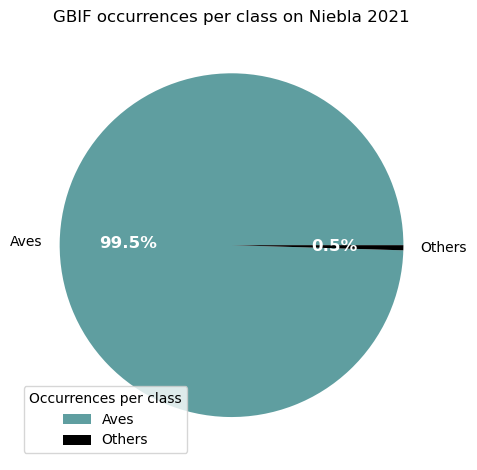

In [25]:
#Gráfico de Clases. Aún no me resulta bien :(

colors = ['cadetblue', 'black']

#Total Class
class_niebla = occ_niebla['clase'].value_counts()
class_niebla_frame = pd.DataFrame(class_niebla)
class_niebla_frame['percent'] = round(((class_niebla_frame['clase']/class_niebla_frame['clase'].sum())*100),2)
class_niebla_aves_ = occ_niebla.query("clase == 'Aves'")
class_niebla_aves = class_niebla_aves_['clase'].value_counts()

#Class excluding Aves
class_niebla_notaves_ = occ_niebla.query("clase!='Aves'")
class_niebla_notaves = class_niebla_notaves_['clase'].value_counts()
class_niebla_notaves_f = pd.DataFrame(class_niebla_notaves)
class_niebla_notaves_f['percent'] = round(((class_niebla_notaves_f['clase']/class_niebla_notaves_f['clase'].sum())*100),1)
class_niebla_notaves_f['percent'] = class_niebla_notaves_f['percent'].astype(str) + '%'

fig1, ax1 = plt.subplots()
labels = ['Aves','Others']
sizes = [int(class_niebla.loc['Aves']),class_niebla_notaves_.shape[0]]
sizes_p = [round(100*sizes[0]/(sizes[0]+sizes[1]),1),round(100*sizes[1]/(sizes[0]+sizes[1]),1)]
wedges, texts, pcts =ax1.pie(sizes,labels=labels,autopct='%1.1f%%',colors = colors) #https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py
plt.setp(pcts, color='white', fontweight='bold',size=12)
ax1.set_title("GBIF occurrences per class on Niebla 2021")
ax1.legend(labels, title="Occurrences per class",loc='lower left')
plt.tight_layout()
plt.show()

# ploteo sin legend
#ax1.pie(sizes, labels=labels,autopct='%1.1f%%',pctdistance=1.2,labeldistance=1.5)
#plot_class_niebla = class_niebla.plot.pie(figsize=(6,6))
#plot_class_niebla.legend(title='Classes',loc="best")
           


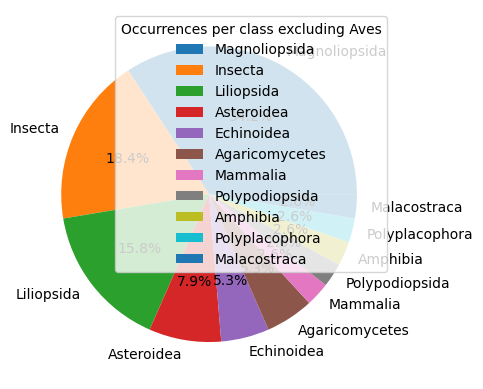

In [26]:
#Plot no aves

#plot_class_niebla_notaves = class_niebla_notaves.plot.pie(figsize=(6,6))
#plot_class_niebla_notaves.legend(title='Classes not including Aves',loc="best")

fig2, ax2 = plt.subplots()
labels2 = class_niebla_notaves_f.index.tolist()
sizes2 = class_niebla_notaves_f.clase.tolist()
ax2.pie(sizes2, labels=labels2, autopct='%1.1f%%')
ax2.legend(title="Occurrences per class excluding Aves", loc='best')
           
           
plt.show()

In [27]:
#Clase Aves
clase_niebla = occ_niebla.copy()
clase_niebla = occ_niebla.query("clase == 'Aves'")

#Frame Order class Aves
clas_order_niebla_frame = clase_niebla.groupby('order')['family'].nunique().to_frame().sort_values(by='family',ascending=False)

In [28]:
clas_order_niebla_frame

,family
order,
Passeriformes,13
Charadriiformes,6
Accipitriformes,3
Pelecaniformes,3
Procellariiformes,3
Suliformes,2
Anseriformes,1
Apodiformes,1
Columbiformes,1


In [29]:
#Los que no funcionaron
#clase_niebla.groupby('order')['family'].value_counts()
#clase_niebla['order'].unique()
#clas_order_fam_niebla = clase_niebla['order'].value_counts(['family'])
#clas_order_fam_niebla

In [30]:
#Riqueza específica order per class
cla_or_niebla =len(clas_order_niebla_frame)

#Riqueza específica family per class
cla_fam_niebla = clas_order_niebla_frame['family'].sum()

#Columnas del dataframe
clas_order_niebla_frame['pi'] = clas_order_niebla_frame['family']/cla_fam_niebla
clas_order_niebla_frame['lnpi'] = np.log(clas_order_niebla_frame['pi'])
clas_order_niebla_frame['pixlnpi'] = clas_order_niebla_frame['pi']*clas_order_niebla_frame['lnpi']
clas_order_niebla_frame['pi2'] = clas_order_niebla_frame['pi']*clas_order_niebla_frame['pi']

#Shannon-Weiner
clas_order_sw_niebla = round(-1*clas_order_niebla_frame['pixlnpi'].sum(),3)
#Gini-Simpson
clas_order_gs_niebla = round(1-(clas_order_niebla_frame['pi2'].sum()),3)
#Hmax
clas_order_hmax_or_niebla = round(np.log(cla_or_niebla),3)
clas_order_hmax_fam_niebla = round(np.log(cla_fam_niebla),3)
#Pielou
clas_order_p_or_niebla = round((clas_order_sw_niebla/clas_order_hmax_or_niebla),3)
clas_order_p_fam_niebla = round((clas_order_sw_niebla/clas_order_hmax_fam_niebla),3)


niebla_aves = {('Aves_Richness_order',cla_or_niebla),('Aves_Richness_family',cla_fam_niebla),
               ('Aves_Shannon-Weiner',clas_order_sw_niebla),('Aves_Gini-Simpson',clas_order_gs_niebla),
               ('Aves_Pielou_order',clas_order_p_or_niebla),('Aves_Pielou_family',clas_order_p_fam_niebla)}

#niebla_aves = {('Aves_Occurrences',xxxx),('Aves_Richness_order',cla_or_niebla),('Aves_Richness_family',cla_fam_niebla),
#               ('Aves_Shannon-Weiner',clas_order_sw_niebla),('Aves_Gini-Simpson',clas_order_gs_niebla),
#               ('Aves_Pielou_order',clas_order_p_or_niebla),('Aves_Pielou_family',clas_order_p_fam_niebla)}

##Datos BD por Ciudad

In [31]:
citi_names.replace({'Valparaiso':'Valparaíso','Constitucion':'Constitución','Bahia Mansa':'Bahía Mansa','Caremapu':'Carelmapu'}, inplace=True)
ncod = pd.Series(['ptosa', 'queu','ser','coq','gua','vil','pichid','ton','ven','conc','zap','tabo','vina','hang','sant','val','dom','quis','quin','pap','car','alg','iqu','pichil','cob','cons','ilo','nie','corr','man','mau','care','anc','cha','ari','antof','toco','mej','talt','cald','huas','quid','tir','coro','lot','pen','paz','talc','tum','tom','hual','ara','leb'])
citi_names['Name Cod']=ncod
dic_cod = citi_names.to_dict #diccionario de nombres de ciudades y códigos

In [32]:
#DataFrame de resultados por ciudad
BD_frame = pd.DataFrame(citi_names)

In [33]:
##Todas las ciudades


In [34]:
files = glob.glob('C:\\Users\\Mariana\\Desktop\\GBIF_BDdata\\**\\occurrence.txt',recursive=True)
col_used = [0,26,59,63,67,72,106,107,108,137,138,180,181,182,187,188,196,197,198,199,200,201,202,203,204,206,207,209,227,229,230,231,232,233,234,235,236,237,238,239,240,241,256]

cities=[]
citynames=[]
for f in tqdm(files): #tqdm para ver el avance del for
    try:
        name_city = f.split('\\')[-2].split('_')[1]
        df_city = pd.read_csv(f, usecols=col_used, sep='\t', low_memory=False)
        cities.append(df_city)
        l = df_city.shape[0]
        for i in range(l):
            citynames.append(name_city)
    except:
        print(f'problemas con {f}')

pd_cities = pd.concat(cities).reset_index(drop=True)

pd_cities.rename(columns={"class":"clase"},inplace=True)

pd_cities["ciudad"] = citynames
del citynames

100%|██████████████████████████████████████████████████████████████████████████████████| 53/53 [00:08<00:00,  6.29it/s]


In [35]:
pd_cities.ciudad.unique()

array(['Algarrobo', 'Ancud', 'Antofagasta', 'Antonio', 'Arauco', 'Arica',
       'Caldera', 'Caremapu', 'Cartagena', 'Chanaral', 'Cobquecura',
       'Concon', 'Constitucion', 'Coquimbo', 'Coronel', 'Corral',
       'Domingo', 'Guanaqueros', 'Hanga', 'Hualpen', 'Huasco', 'Iloca',
       'Iquique', 'Lebu', 'LosVilos', 'Lota', 'Mansa', 'Maullin',
       'Mejillones', 'Niebla', 'Papudo', 'Penco', 'Pichidangui',
       'Pichilemu', 'Queule', 'Quidico', 'Quintero', 'Quisco', 'Saavedra',
       'SanPedro', 'Serena', 'Tabo', 'Talcahuano', 'Taltal', 'Tirua',
       'Tocopilla', 'Tome', 'Tongoy', 'Tumbes', 'Valpo', 'VentanasHorcon',
       'Vina', 'Zapallar'], dtype=object)

In [36]:
conjunto_ciudades_de_pd_cities = set(pd_cities.ciudad.unique())
conjunto_ciudades_bdframe = set(BD_frame.Name)
conjunto_ciudades_de_pd_cities.difference(conjunto_ciudades_bdframe)
conjunto_ciudades_bdframe.difference(conjunto_ciudades_de_pd_cities)
diccionario_rename = {'Antonio': 'San Antonio','Caremapu':'Carelmapu','Constitucion':'Constitución','Chanaral':'Chañaral','Concon':'Concón','Domingo':'Santo Domingo','Hanga':'Hanga Roa','Hualpen':'Hualpén','LosVilos':'Los Vilos','Mansa':'Bahía Mansa','Maullin':'Maullín','Quisco':'El Quisco','Saavedra':'Puerto Saavedra','SanPedro':'San Pedro de La Paz','Serena':'La Serena','Tabo':'El Tabo','Tirua':'Tirúa','Tome':'Tomé','Tumbes':'Caleta Tumbes','Valpo':'Valparaíso','VentanasHorcon':'Las Ventanas-Horcón-Maitencillo','Vina':'Viña del Mar'}
pd_cities.replace(diccionario_rename, inplace=True)

In [41]:
pd_cities.head(1)

,gbifID,identifier,institutionCode,basisOfRecord,occurrenceID,individualCount,year,month,day,decimalLatitude,...,orderKey,familyKey,genusKey,subgenusKey,speciesKey,species,acceptedScientificName,verbatimScientificName,iucnRedListCategory,ciudad
0,3881681384,100265267,iNaturalist,HUMAN_OBSERVATION,https://www.inaturalist.org/observations/10026...,NaN,2021,10,31,-33.368358,...,1470.0,7838,3263088.0,NaN,NaN,NaN,"Brachidia Solier, 1849",Brachidia ruficollis,NaN,Algarrobo


In [37]:
#HACER UN DICCIONARIO PARA ASOCIAR EL NOMBRE DE LA CIUDAD CON SU CÓDIGO
dict_cod=dict()
for i in citi_names.index:
    dict_cod = dict([(citi_names['Name'],citi_names['Name Cod'])])
    dict_cod
    
#COPIAR LA COLUMNA CIUDAD A UNA CON EL CÓDIGO    
pd_cities['ncod'] = pd_cities['ciudad']

#REEMPLAZAR LOS VALORES DE LA COLUMNA COPIADA A LOS CÓDIGOS DEL DICCIONARIO
pd_cities.ncod.replace(dic_cod, inplace=True)

#preguntarle al pipe y/u Horacio si está bien y arreglarlo para que funcione

TypeError: unhashable type: 'Series'

In [ ]:
## Gráfico clases totales

In [ ]:
#Tabla clases totales (imprimir para documento)
class_total_frame = pd.DataFrame(total_class)
class_total_frame['percent'] = ((class_total_frame['clase']/class_total_frame['clase'].sum())*100)
#class_total_frame.rename(columns={'clase':'occurrences'}).rename_axis('Class',axis='columns') #ESTO NO FUNCIONA 
#class_total_frame['occurrences'].round(0) #ESTO NO FUNCIONA
class_total_frame.loc['Total']=class_total_frame.sum()
class_total_frame['percent'] = class_total_frame['percent'].round(3).astype(str) + '%'
class_total_frame

In [ ]:
pd_cities['verbatimScientificName'].value_counts()

In [ ]:
#Clases totales
total_class = pd_cities['clase'].value_counts() #para mostrar todas
notaves_cities = pd_cities.query("clase != 'Aves'")['clase'].value_counts()
aves_cities = pd_cities.query("clase == 'Aves'")['clase'].value_counts()


fig2, ax2 = plt.subplots()
colors=['cadetblue','black']
labels = ['Aves','Others']
sizes = [int(aves_cities.sum()),int(notaves_cities.sum())]
wedges, texts, pcts =ax2.pie(sizes,labels=labels,autopct='%1.1f%%',colors = colors) #https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py
plt.setp(pcts, color='white', fontweight='bold',size=12)
ax2.set_title("GBIF occurrences per class in Chile 2021")
ax2.legend(labels, title="Occurrences per class",loc='lower left')
plt.tight_layout()
plt.savefig("GBIFChile2021.png",format='png')
plt.show()


In [ ]:
#Plot no aves
notaves_cities_f = pd.DataFrame(notaves_cities)
fig3, ax3 = plt.subplots()
labels3 = notaves_cities_f.index.tolist()
sizes3 = notaves_cities_f.clase.tolist()
ax3.pie(sizes3, labels=labels3, autopct='%1.1f%%')
ax3.legend(title="Occurrences per class excluding Aves in Chile 2021", loc='right')
           
plt.show()

In [ ]:
pd_cities.keys()

In [ ]:
#Esto es mejor como violinplot AUNQUE NO CACHO CÓMO HACERLO
y = pd_cities['decimalLatitude'].tolist() #tendré que ordenarla de menor a mayor? #también para encontrar min y max pd_cities.decimalLatitude.min()
#fig = plt.violinplot(y,pd_cities['verbatimScientificName'].valuecounts()) #algo así??
fig = plt.violinplot(y,pd_cities['verbatimScientificName'])
fig.show()
# Con plotly express no entiendo cuál es el x https://plotly.com/python/violin/#violin-plot-with-plotly-express
# Tengo importado matplotlib, pero no hay algún ejemplo
# Estaba viendo este video https://www.youtube.com/watch?v=W0MufH1eOs8

In [ ]:
#intento 3 (estuvo corriendo mucho rato) revisar con pipe
groups = pd_cities.groupby(pd_cities.ncod)
for city in pd_cities.ncod:
    fil = groups.get_group(city)



#intento 2
#fil = pd.DataFrame()
#for city in pd_cities.ncod:
#    fil = pd_cities[pd_cities['ncod']==city]

#intento 1
#alg_fil2 = pd_cities.filter('ncod'=='alg')

In [67]:
#Datos BD por ciudad

dfs = {}
ciudades = pd_cities.ciudad.unique()
output_df = {}
n_especies = {}
especies = {}
for city in ciudades:
    dfs[city] = pd_cities.query('ciudad==@city') #pd_cities[pd_cities['ciudad']==city] #DataFrame por ciudad
    #ocurrencias[city] = dfs[city].shape[0] #Occurrences por ciudad

    n_especies[city] = dfs[city]['verbatimScientificName'].nunique() #Species richness por ciudad
    especies[city] = dfs[city]['verbatimScientificName'].value_counts().reset_index() #Species richness por ciudad

    especies[city]['pi'] = especies[city]['verbatimScientificName']/dfs[city].shape[0]
    especies[city]['pi_x_logpi'] = especies[city].eval('pi*log(pi)')
    especies[city]['pi_square'] = especies[city].eval('pi*pi')
    
    #Output especies
    #Shannon-Weiner
    sw = round(-1*especies[city]['pi_x_logpi'].sum(),3)
    #Gini-Simpson
    gs = round(1-(especies[city]['pi_square'].sum()),3)
    #Hmax
    hmax = round(np.log(n_especies[city]),3)
    #Pielou
    pl = round((sw/hmax),3)
    
    output_df[city] = pd.DataFrame({'ciudad': [city], 'shannon-weiner': [sw], 'gini-simpson': [gs], 'pielou': [pl]})

In [68]:
pd.concat(output_df).reset_index(drop=True)

,ciudad,shannon-weiner,gini-simpson,pielou
0,Algarrobo,4.350,0.982,0.791
1,Ancud,4.084,0.979,0.895
2,Antofagasta,3.925,0.970,0.756
3,San Antonio,4.493,0.985,0.820
4,Arauco,4.135,0.979,0.912
5,Arica,4.060,0.977,0.815
6,Caldera,4.003,0.973,0.821
7,Carelmapu,2.948,0.945,0.984
8,Cartagena,4.237,0.980,0.814
9,Chañaral,3.294,0.960,0.978


In [ ]:



#Shannon-Weiner
esp_sw_val = round(-1*esp_val_f['pixlnpi'].sum(),3)
#Gini-Simpson
esp_gs_val = round(1-(esp_val_f['pi2'].sum()),3)
#Hmax
esp_hmax_val = round(np.log(esp_val),3)
#Pielou
esp_p_val = round((esp_sw_val/esp_hmax_val),3)

#niebla = {('Occurrences',occu_niebla),('Sp_richness',esp_niebla),('Sp_Shannon-weiner',esp_sw_niebla),('Sp_Gini-Simpson',esp_gs_niebla),('Sp_Pielou',esp_p_niebla)}

In [ ]:
#Datos BD por ciudad

fil_alg = pd_cities[pd_cities['ciudad']=='Algarrobo'] #DataFrame por ciudad


occ_alg = fil_alg.shape[0] #Occurrences por ciudad


esp_alg=len(fil_alg['verbatimScientificName'].value_counts()) #Species richness por ciudad
esp_val=len(fil_val['verbatimScientificName'].value_counts())

esp_alg_s = fil_alg['verbatimScientificName'].value_counts() #Especies (verbatimScientificName) y cuántas ocurrencias hay por especie
esp_val_s = fil_val['verbatimScientificName'].value_counts() 

esp_alg_f = pd.DataFrame(esp_alg_s) #DataFrame cálculos especie
esp_val_f = pd.DataFrame(esp_val_s)

#Columnas del dataframe
esp_alg_f['pi'] = esp_alg_f['verbatimScientificName']/occ_alg
esp_alg_f['lnpi'] = np.log(esp_alg_f['pi'])
esp_alg_f['pixlnpi'] = esp_alg_f['pi']*esp_alg_f['lnpi']
esp_alg_f['pi2'] = esp_alg_f['pi']*esp_alg_f['pi']

esp_val_f['pi'] = esp_val_f['verbatimScientificName']/occ_val
esp_val_f['lnpi'] = np.log(esp_val_f['pi'])
esp_val_f['pixlnpi'] = esp_val_f['pi']*esp_val_f['lnpi']
esp_val_f['pi2'] = esp_val_f['pi']*esp_val_f['pi']

#Output especies
#Shannon-Weiner
esp_sw_alg = round(-1*esp_alg_f['pixlnpi'].sum(),3)
#Gini-Simpson
esp_gs_alg = round(1-(esp_alg_f['pi2'].sum()),3)
#Hmax
esp_hmax_alg = round(np.log(esp_alg),3)
#Pielou
esp_p_alg = round((esp_sw_alg/esp_hmax_alg),3)

#Shannon-Weiner
esp_sw_val = round(-1*esp_val_f['pixlnpi'].sum(),3)
#Gini-Simpson
esp_gs_val = round(1-(esp_val_f['pi2'].sum()),3)
#Hmax
esp_hmax_val = round(np.log(esp_val),3)
#Pielou
esp_p_val = round((esp_sw_val/esp_hmax_val),3)

#niebla = {('Occurrences',occu_niebla),('Sp_richness',esp_niebla),('Sp_Shannon-weiner',esp_sw_niebla),('Sp_Gini-Simpson',esp_gs_niebla),('Sp_Pielou',esp_p_niebla)}




In [ ]:
#Ahora solo para aves

#Clase Aves
clase_niebla = occ_niebla.copy()
clase_niebla = occ_niebla.query("clase == 'Aves'")

#Frame Order class Aves
clas_order_niebla_frame = clase_niebla.groupby('order')['family'].nunique().to_frame().sort_values(by='family',ascending=False)

#Riqueza específica order per class
cla_or_niebla =len(clas_order_niebla_frame)

#Riqueza específica family per class
cla_fam_niebla = clas_order_niebla_frame['family'].sum()

#Columnas del dataframe
clas_order_niebla_frame['pi'] = clas_order_niebla_frame['family']/cla_fam_niebla
clas_order_niebla_frame['lnpi'] = np.log(clas_order_niebla_frame['pi'])
clas_order_niebla_frame['pixlnpi'] = clas_order_niebla_frame['pi']*clas_order_niebla_frame['lnpi']
clas_order_niebla_frame['pi2'] = clas_order_niebla_frame['pi']*clas_order_niebla_frame['pi']

#Shannon-Weiner
clas_order_sw_niebla = round(-1*clas_order_niebla_frame['pixlnpi'].sum(),3)
#Gini-Simpson
clas_order_gs_niebla = round(1-(clas_order_niebla_frame['pi2'].sum()),3)
#Hmax
clas_order_hmax_or_niebla = round(np.log(cla_or_niebla),3)
clas_order_hmax_fam_niebla = round(np.log(cla_fam_niebla),3)
#Pielou
clas_order_p_or_niebla = round((clas_order_sw_niebla/clas_order_hmax_or_niebla),3)
clas_order_p_fam_niebla = round((clas_order_sw_niebla/clas_order_hmax_fam_niebla),3)


niebla_aves = {('Aves_Richness_order',cla_or_niebla),('Aves_Richness_family',cla_fam_niebla),
               ('Aves_Shannon-Weiner',clas_order_sw_niebla),('Aves_Gini-Simpson',clas_order_gs_niebla),
               ('Aves_Pielou_order',clas_order_p_or_niebla),('Aves_Pielou_family',clas_order_p_fam_niebla)}